# How to create a custom ***Word2Vec*** model based on *Lord of the Rings* trilogy.

### Step 1. Import all necessary libraries

*** Don't forget to download all necessary data from `nltk` library

In [2]:
import os
import numpy as np
import pandas as pd
import gensim
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

In [3]:
# Download all NLTK data without displaying the download progress
nltk.download("all", quiet=True)

True

### Step 2. Load the data files

In [4]:
files = os.listdir("lord_of_the_rings")

### Step 3. Break each file into sentences & each sentence into words and append them into a list.

In [5]:
# The list where words will be stored
story = []

for file in files:
    with open("lord_of_the_rings/" + file, "r", encoding="unicode_escape") as f:
        file_data = f.read()
        sentences = sent_tokenize(file_data)
        for sentence in sentences:
            words = simple_preprocess(sentence)
            story.append(words)

### Step 4. Remove stop words from the list using `nltk` library

In [6]:
# Define which language stop words you will use
stop_words = stopwords.words("english")

# Remove "English" stop words from words list
story = [[word for word in sentence if word not in stop_words] for sentence in story]

### Step 5. Train your own ***Word2Vec*** model using `gensim` library

In [7]:
# Create a Word2Vec model named "custom_model" with specified parameters:
# - window: Consider 10 words before and after the target word for context.
# - min_count: Ignore words appearing less than 5 times in the corpus.
# - vector_size: Represent each word with a 300-dimensional vector.
custom_model = gensim.models.Word2Vec(window=10, min_count=5, vector_size=300)

# Build the vocabulary for the model based on the "story" corpus.
custom_model.build_vocab(story)

# Train the model using the "story" corpus.
# total_examples: Use the total number of sentences in the corpus for training.
# epochs: Train for the default number of epochs specified in the model.
custom_model.train(story, total_examples=custom_model.corpus_count, epochs=custom_model.epochs)

(1012855, 1146165)

### Step 6. Results:

- Total number of raw words in training corpus: **1012890**
- Number of word occurrences used approximately by the model for training after applying its settings (like window size and minimum count): **1,146,165**

### Now let's apply some tests to our custom model

In [8]:
# Check the most similar words for "Lord of the Rings" characters
frodo = custom_model.wv.most_similar("frodo")
print(f"Most similar words for Frodo: {frodo}")

aragorn = custom_model.wv.most_similar("aragorn")
print(f"Most similar words for Aragorn: {aragorn}")

gandalf = custom_model.wv.most_similar("gandalf")
print(f"Most similar words for Gandalf: {gandalf}")

Most similar words for Frodo: [('merry', 0.9899693727493286), ('pippin', 0.98923259973526), ('sam', 0.9891533851623535), ('aragorn', 0.9818758368492126), ('gimli', 0.9778738021850586), ('gandalf', 0.9762684106826782), ('legolas', 0.9618698358535767), ('faramir', 0.9529932141304016), ('strider', 0.9403483271598816), ('jomer', 0.9369390606880188)]
Most similar words for Aragorn: [('gandalf', 0.9979585409164429), ('gimli', 0.9959226846694946), ('frodo', 0.9818758368492126), ('legolas', 0.9790178537368774), ('faramir', 0.9773834943771362), ('merry', 0.9716241955757141), ('jomer', 0.9695050120353699), ('strider', 0.9692471623420715), ('pippin', 0.9619823098182678), ('sam', 0.9594564437866211)]
Most similar words for Gandalf: [('aragorn', 0.9979585409164429), ('gimli', 0.9974122047424316), ('legolas', 0.9811651110649109), ('faramir', 0.9801109433174133), ('frodo', 0.9762684106826782), ('strider', 0.9754600524902344), ('jomer', 0.9739781618118286), ('merry', 0.9675945043563843), ('yes', 0.964

In [9]:
# Check unrelated word between "Lord of the Rings" characters
custom_model.wv.doesnt_match(["frodo", "aragorn", "gandalf", "saruman", "sword"])

'sword'

## Appendix

In [25]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Task 1. Suppress vector dimenssion from 300 to 2 and 3 using Principal Component Analysis (PCA)

In [11]:
# Extract all word vectors from our trained Word2Vec model
word_vectors = custom_model.wv.vectors

# Initialize PCA with 2 components
pca2 = PCA(n_components=2)
# Initialize PCA with 3 components
pca3 = PCA(n_components=3)

# Fit PCA to the word vectors and transform them into 2 dimenssions
reduced_vectors2 = pca2.fit_transform(word_vectors)

# Fit PCA to the word vectors and transform them into 3 dimenssions
reduced_vectors3 = pca3.fit_transform(word_vectors)

Now let's compare the lenght of first word's vector *before* and *after* applying PCA.

In [12]:
print(f"Length of first word's vector before PCA: {len(word_vectors[0])}")
print(f"Length of first word's vector after PCA (2 dimenssions): {len(reduced_vectors2[0])}")
print(f"Length of first word's vector after PCA (3 dimenssions): {len(reduced_vectors3[0])}")

Length of first word's vector before PCA: 300
Length of first word's vector after PCA (2 dimenssions): 2
Length of first word's vector after PCA (3 dimenssions): 3


### Task 2. Plot the suppressed vectors in 2D & 3D graphs

Because of the large number of words in our vocabulary, we'll use a small sample that consists of main characters in the movie and the races in "Lord of the Rings" universe.

In [13]:
# Main Characters
main_characters = [
    "Frodo", "Samwise", "Sam", "Meriadoc", "Merry", "Brandybuck", "Peregrin", "Pippin", "Took",
    "Aragorn", "Strider", "Boromir", "Faramir", "Legolas", "Arwen", "Galadriel", "Elrond",
    "Gimli", "Gandalf", "Saruman", "Radagast", "Gollum", "Sauron", "Shelob", "Treebeard"
]

# Races
races = [
    "Hobbits", "Men", "Elves", "Dwarves", "Orc", "Uruk", "Trolls", "Ents", "Eagles", "Balrog", "Dragons"
]

sample = main_characters + races

# Apply lowering to all characters for each element in sample list
sample = [word.lower() for word in sample]

We create a list of suppressed vectors for our sample

In [14]:
# 'words' is a list of words from our vocabulary
words = list(custom_model.wv.key_to_index)

# 'sample_words' contains the words we want to plot
sample_words = [word for word in sample if word in words]

# 'sample_vectors2' contains the suppressed vectors of our sample words with 2 dimenssions
sample_vectors2 = [reduced_vectors2[words.index(word)] for word in sample_words]

# 'sample_vectors3' contains the suppressed vectors of our sample words with 3 dimenssions
sample_vectors3 = [reduced_vectors3[words.index(word)] for word in sample_words]

Now we're ready to plot our sample!

- First in 2D

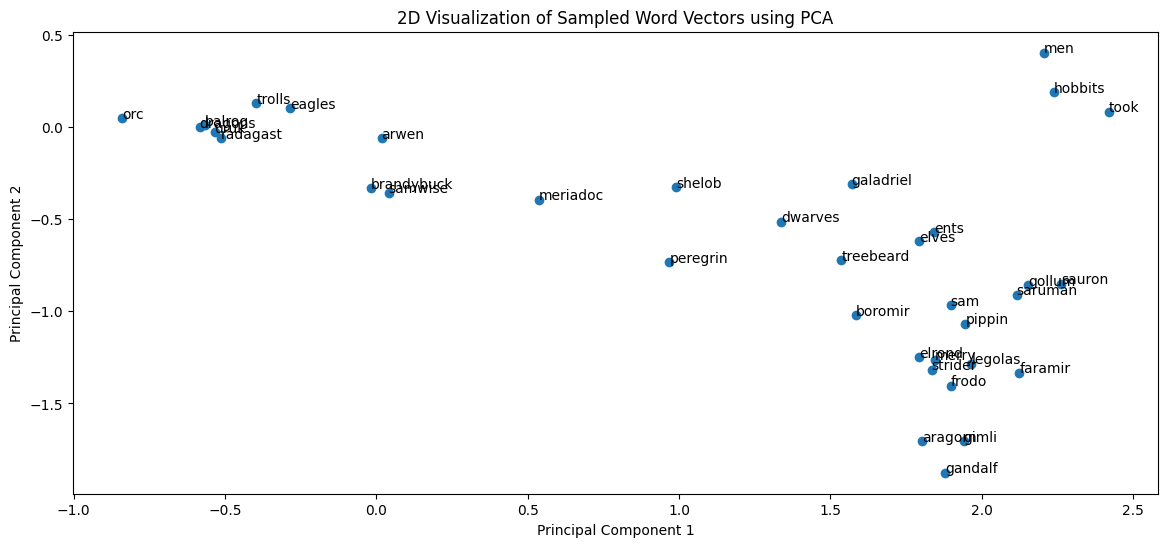

In [15]:
# Create a scatter plot
plt.figure(figsize=(14, 6))
plt.scatter([v[0] for v in sample_vectors2], [v[1] for v in sample_vectors2])

# Annotate points with words
for i, word in enumerate(sample_words):
    plt.annotate(word, xy=(sample_vectors2[i][0], sample_vectors2[i][1]))

plt.title("2D Visualization of Sampled Word Vectors using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

- And then in 3D

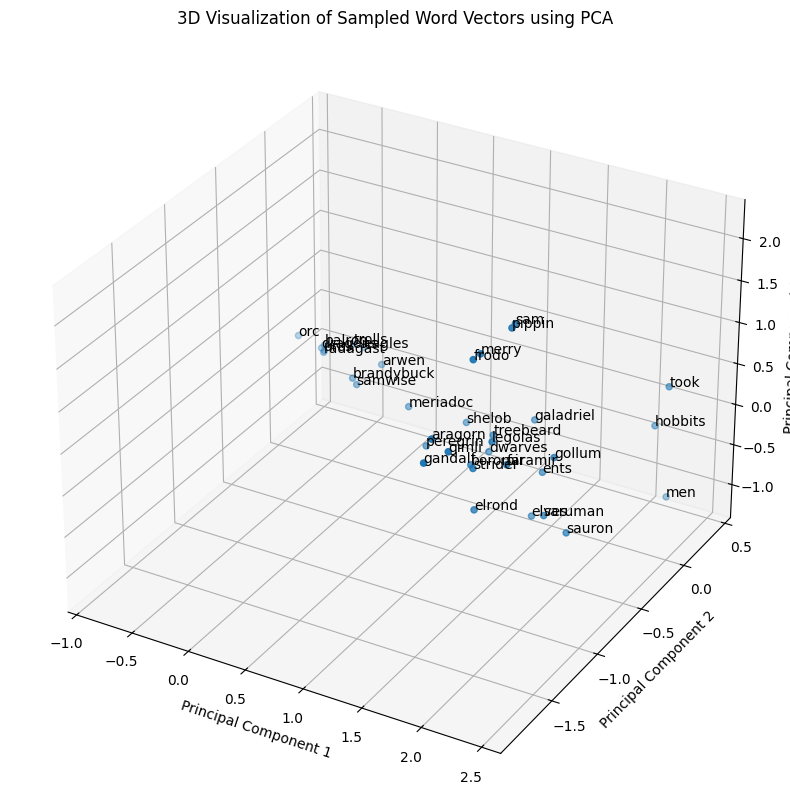

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter the reduced vectors in 3D space
ax.scatter([v[0] for v in sample_vectors3],
           [v[1] for v in sample_vectors3],
           [v[2] for v in sample_vectors3])

# Annotate points with words
for i, word in enumerate(sample_words):
    ax.text(sample_vectors3[i][0],
            sample_vectors3[i][1],
            sample_vectors3[i][2], word)

# Set plot labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of Sampled Word Vectors using PCA")

# Display the plot
plt.show()

### Task 3. Check the similarity between our sample words *before* and *after* PCA

In [30]:
# Let's check the 5 most similar words for the word "Frodo" before applying PCA
frodo_before_pca = custom_model.wv.most_similar("frodo", topn=5)
print("Top 5 most similar words for Frodo before PCA:")
for word, similarity in frodo_before_pca:
    print(f"{word}: {similarity:.4f}")

Top 5 most similar words for Frodo before PCA:
merry: 0.9900
pippin: 0.9892
sam: 0.9892
aragorn: 0.9819
gimli: 0.9779


In [28]:
# Get the index of "frodo" in your vocabulary
frodo_index = words.index('frodo')

# Get the reduced vector for "frodo" (using the 2D reduced vectors here)
frodo_vector_pca = reduced_vectors2[frodo_index]

# Calculate cosine similarities between 'frodo_vector_pca' and all other reduced vectors
similarities = cosine_similarity([frodo_vector_pca], reduced_vectors2)

# Get the indices of the most similar words and their similarity scores, excluding "frodo" itself
most_similar_indices_scores = similarities.argsort()[0][-6:-1]
most_similar_scores = similarities[0][most_similar_indices_scores]

# Get the words corresponding to the most similar indices
most_similar_words_pca = [words[i] for i in most_similar_indices_scores]

# Print the results
print("Top 5 most similar words for Frodo after PCA (2D):")
for word, score in zip(most_similar_words_pca, most_similar_scores):
    print(f"{word}: {score:.4f}")

Top 5 most similar words for Frodo after PCA (2D):
meriadoc: 1.0000
allowed: 1.0000
quietly: 1.0000
hear: 1.0000
look: 1.0000


In [29]:
# Get the reduced vector for "frodo" (using the 3D reduced vectors here)
frodo_vector_pca = reduced_vectors3[frodo_index]

# Calculate cosine similarities between 'frodo_vector_pca' and all other reduced vectors
similarities = cosine_similarity([frodo_vector_pca], reduced_vectors3)

# Get the indices of the most similar words and their similarity scores, excluding "frodo" itself
most_similar_indices_scores = similarities.argsort()[0][-6:-1]
most_similar_scores = similarities[0][most_similar_indices_scores]

# Get the words corresponding to the most similar indices
most_similar_words_pca = [words[i] for i in most_similar_indices_scores]

# Print the results
print("Top 5 most similar words for Frodo after PCA (3D):")
for word, score in zip(most_similar_words_pca, most_similar_scores):
    print(f"{word}: {score:.4f}")

Top 5 most similar words for Frodo after PCA (3D):
ear: 0.9815
sam: 0.9917
pippin: 0.9943
whisper: 0.9979
merry: 0.9996


# Conclusion

As we can see even adding one more dimenssion (from 2 dimenssions to 3 dimensssions) help dramatically to get more of the most similar words we get back with the full 300 dimenssions.